# 카드

# 카드 거래 이력 분석을 통한 고객 특성 파악

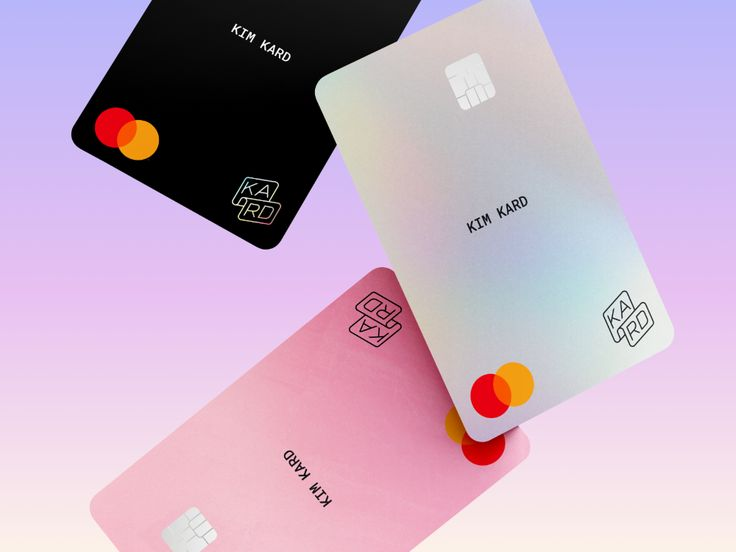

## 📖 목차
- 비즈니스 시나리오
- 업종별 사용 형태 분석
    - 업종별 이용 및 매출 비중 분석
- 핵심 업종 탐색
    - 업종별 이용 고객수 분석
    - 1회 사용 금액 / 객단가 분석
    - 핵심업종 정의
- 핵심업종 추가 분석
    - 핵심업종 주말/주중/공휴일 분석
    - 핵심업종 일시불 및 할부결제 분석
    - 핵심업종 취소금액 분석¶
    - 핵심업종 년도별 매출 비중 변화 분석

## 💼 비즈니스 시나리오

A사는 신규 브랜드의 점포를 입점 시키려는 계획을 가지고 있다. <br>
신규 브랜드이기 때문에 과거 상권에 대한 정보가 없어, 어느 지역에 입점을 시켜야할지 고민이 많다. <br>
고민 끝에 후보 지역A를 최종 후보로 정했다. <br>
하지만 자신들의 브랜드와 해당 지역에 거주하는 고객의 소비성향과 비슷한지가 아직 의문이다. <br>
따라서 신용카드 Spending data를 활용하여 고객의 소비 성향을 파악하고자 한다. <br>
파악된 고객의 소비성향과 브랜드의 성향이 맞는지 비교해보고 최종 결정을 내리고자 한다.

### 🔎 문제 정의

신규 브랜드 입점 상권 불분명

### ✨ 기대 효과

신규 상권 입점 여부 결정 및 상권의 고객 소비성향 파악

### ✔️ 해결 방안

카드 Spending data 활용 지역 거주 고객 소비성향 파악 및 브랜드와 매칭을 통해 입점 결정

### 🗝️ 성과 측정

신규 진입 결정 여부

### ⚙️ 운영

- 인사이트 Report 작성 및 보고

## 🗂️ DATA
* 상점 ID별 카드 Spending data
* 데이터 명세 ⬇

|store_id|date|time|card_id|amount|installments|
|:---:|:---:|:---:|:---:|:---:|:---:|
|상점 ID|날짜|시간|카드 ID|매출액(음수는 거래취소)|할부개월, 일시불은 빈문자열|
|dats_of_week|holyday|
|요일(월요일0, 일요일6)|공휴일 여부|

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
df = pd.read_csv('./S_PJT04_DATA.csv')
df.head()

,store_id,date,time,card_id,amount,installments,days_of_week,holyday
0,0,2016-12-14,18:05:31,d297bba73f,5,NaN,2,0
1,0,2016-12-14,18:05:54,d297bba73f,-5,NaN,2,0
2,0,2016-12-19,12:42:31,0880849c05,144,NaN,0,0
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,NaN,0,0
4,0,2016-12-19,13:31:08,7ad237eed0,24,NaN,0,0


### ► 데이터 기본 정보 확인
- Data Shape(형태) 확인
- Data Type 확인
- Null값 확인
- Outlier 확인

In [4]:
# Data Shape
df.shape

(3362796, 8)

In [5]:
# Data Type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3362796 entries, 0 to 3362795
Data columns (total 8 columns):
 #   Column        Dtype  
---  ------        -----  
 0   store_id      int64  
 1   date          object 
 2   time          object 
 3   card_id       object 
 4   amount        int64  
 5   installments  float64
 6   days_of_week  int64  
 7   holyday       int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 205.2+ MB


In [6]:
# Null값 확인
df.isnull().sum()

store_id              0
date                  0
time                  0
card_id               0
amount                0
installments    3345936
days_of_week          0
holyday               0
dtype: int64

In [7]:
# Outlier 확인, 음수값 확인
pd.DataFrame(df.describe())

,store_id,amount,installments,days_of_week,holyday
count,3.362796e+06,3.362796e+06,16860.000000,3.362796e+06,3.362796e+06
mean,8.323770e+02,1.459623e+02,3.459490,3.066320e+00,4.431283e-02
std,5.468544e+02,6.017306e+02,2.382382,1.976153e+00,2.057892e-01
min,0.000000e+00,-2.500000e+05,2.000000,0.000000e+00,0.000000e+00
25%,3.350000e+02,3.200000e+01,3.000000,1.000000e+00,0.000000e+00
50%,8.220000e+02,7.500000e+01,3.000000,3.000000e+00,0.000000e+00
75%,1.342000e+03,1.500000e+02,3.000000,5.000000e+00,0.000000e+00
max,1.799000e+03,2.500000e+05,36.000000,6.000000e+00,1.000000e+00


In [8]:
# 할부개월(installments)에서 '일시불'은 빈문자열이기 때문에 0으로 변환 처리
df['installments'].fillna(0, inplace=True)

In [9]:
# Null값 확인
df.isnull().sum()

store_id        0
date            0
time            0
card_id         0
amount          0
installments    0
days_of_week    0
holyday         0
dtype: int64

## 📍 업종별 사용 형태 분석

### ► 업종별 이용 및 매출 비중 분석

In [10]:
df.head()

,store_id,date,time,card_id,amount,installments,days_of_week,holyday
0,0,2016-12-14,18:05:31,d297bba73f,5,0.0,2,0
1,0,2016-12-14,18:05:54,d297bba73f,-5,0.0,2,0
2,0,2016-12-19,12:42:31,0880849c05,144,0.0,0,0
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,0.0,0,0
4,0,2016-12-19,13:31:08,7ad237eed0,24,0.0,0,0


In [12]:
# 총 1,775개의 Unique한 상점이 존재

df['store_id'].value_counts()

store_id
0       68773
753     39318
105     36063
1342    33335
428     33285
        ...  
1605        1
991         1
1263        1
1530        1
632         1
Name: count, Length: 1775, dtype: int64

In [14]:
# 업종별 이용 횟수 비중

df_store = pd.DataFrame(df['store_id'].value_counts()).reset_index()
df_store.columns = ['store_id', 'cnt']
df_store.head(5)

,store_id,cnt
0,0,68773
1,753,39318
2,105,36063
3,1342,33335
4,428,33285


In [15]:
# 업종별 이용 횟수 비중 Top 10

df_store['total'] = df_store['cnt'].sum()
df_store['ratio'] = round( (df_store['cnt'] / df_store['total'])*100, 2)
df_store.head(10)

,store_id,cnt,total,ratio
0,0,68773,3362796,2.05
1,753,39318,3362796,1.17
2,105,36063,3362796,1.07
3,1342,33335,3362796,0.99
4,428,33285,3362796,0.99
5,221,31409,3362796,0.93
6,161,27170,3362796,0.81
7,1038,25694,3362796,0.76
8,323,25221,3362796,0.75
9,1366,24946,3362796,0.74


In [16]:
# 업종별 매출액 비중
# store_id, amount

df_amt = pd.DataFrame(df['amount'].groupby(df['store_id']).sum()).reset_index()
df_amt.head(5)

,store_id,amount
0,0,5234611
1,1,147950
2,2,1615060
3,3,62781
4,4,270312


In [17]:
# 매출액 기준 내림차순 정렬

df_amt = df_amt.sort_values(by=['amount'], ascending=False)
df_amt.head(5)

,store_id,amount
746,753,9474601
1326,1342,7301327
158,161,5236075
0,0,5234611
948,958,4965728


In [18]:
# 업종별 매출액 비중 Top 10

df_amt['total'] = df_amt['amount'].sum()
df_amt['ratio'] = round((df_amt['amount'] / df_amt['total']) * 100, 2)
df_amt.head(10)

,store_id,amount,total,ratio
746,753,9474601,490841453,1.93
1326,1342,7301327,490841453,1.49
158,161,5236075,490841453,1.07
0,0,5234611,490841453,1.07
948,958,4965728,490841453,1.01
1065,1076,4860885,490841453,0.99
801,810,3677501,490841453,0.75
1013,1024,3330293,490841453,0.68
480,486,3235482,490841453,0.66
590,597,2999180,490841453,0.61


업종이 1,755개로 많다보니 각각의 매출액 비중은 1% 대 밖에 가져가지 못한다. <br>
추후, 업종에 관한 정보가 더 있다면 비슷한 업종별로 그룹핑하여 보면 좋을 것 같다.

## 📍 핵심 업종 탐색

### ► 업종별 이용 고객수 분석

In [19]:
# 상위에서 정의한 이용 비중 Data

df_store.columns = ['store_id', 'cnt', 'cnt_total', 'cnt_ratio']
df_store.head(5)

,store_id,cnt,cnt_total,cnt_ratio
0,0,68773,3362796,2.05
1,753,39318,3362796,1.17
2,105,36063,3362796,1.07
3,1342,33335,3362796,0.99
4,428,33285,3362796,0.99


In [20]:
# 상위에서 정의한 매출 비중 Data

df_amt.columns = ['store_id', 'amt', 'amt_total', 'amt_ratio']
df_amt.head(5)

,store_id,amt,amt_total,amt_ratio
746,753,9474601,490841453,1.93
1326,1342,7301327,490841453,1.49
158,161,5236075,490841453,1.07
0,0,5234611,490841453,1.07
948,958,4965728,490841453,1.01


In [21]:
# Data Merge

df_merge = pd.merge(df_store, df_amt, how='left', on='store_id')
df_merge.head(5)

,store_id,cnt,cnt_total,cnt_ratio,amt,amt_total,amt_ratio
0,0,68773,3362796,2.05,5234611,490841453,1.07
1,753,39318,3362796,1.17,9474601,490841453,1.93
2,105,36063,3362796,1.07,2991082,490841453,0.61
3,1342,33335,3362796,0.99,7301327,490841453,1.49
4,428,33285,3362796,0.99,1312204,490841453,0.27


In [23]:
# 이용 고객수 (Unique)

df_customer = pd.DataFrame(df['card_id'].groupby(df['store_id']).nunique()).reset_index()
df_customer.columns = ['store_id', 'customer']
df_customer['customer_total'] = df['card_id'].nunique()
df_customer['customer_ratio'] = round((df_customer['customer'] / df_customer['customer_total']) * 100, 2)
df_customer.head(5)

,store_id,customer,customer_total,customer_ratio
0,0,12727,922522,1.38
1,1,8,922522,0.00
2,2,9053,922522,0.98
3,3,231,922522,0.03
4,4,1176,922522,0.13


In [24]:
# 이용 고객수 기준 내림차순 정렬
df_customer.sort_values(by='customer_ratio', ascending=False).head(10)

,store_id,customer,customer_total,customer_ratio
423,428,18456,922522,2.00
218,221,17161,922522,1.86
289,293,14915,922522,1.62
1326,1342,14789,922522,1.60
932,942,13760,922522,1.49
1196,1209,13512,922522,1.46
0,0,12727,922522,1.38
1027,1038,12523,922522,1.36
746,753,11960,922522,1.30
123,126,11070,922522,1.20


In [25]:
# 이용 고객수 Merge

df_merge = pd.merge(df_merge, df_customer, how='left', on='store_id')
df_merge.head(5)

,store_id,cnt,cnt_total,cnt_ratio,amt,amt_total,amt_ratio,customer,customer_total,customer_ratio
0,0,68773,3362796,2.05,5234611,490841453,1.07,12727,922522,1.38
1,753,39318,3362796,1.17,9474601,490841453,1.93,11960,922522,1.30
2,105,36063,3362796,1.07,2991082,490841453,0.61,8207,922522,0.89
3,1342,33335,3362796,0.99,7301327,490841453,1.49,14789,922522,1.60
4,428,33285,3362796,0.99,1312204,490841453,0.27,18456,922522,2.00


### ► 1회 사용 금액 / 객단가 분석

In [26]:
# 1회 사용 금액
df_merge['amt_per_use'] = round(df_merge['amt'] / df_merge['cnt'], 0)

# 객단가
df_merge['cus_per_use'] = round(df_merge['amt'] / df_merge['customer'], 0)

df_merge.head(5)

,store_id,cnt,cnt_total,cnt_ratio,amt,amt_total,amt_ratio,customer,customer_total,customer_ratio,amt_per_use,cus_per_use
0,0,68773,3362796,2.05,5234611,490841453,1.07,12727,922522,1.38,76.0,411.0
1,753,39318,3362796,1.17,9474601,490841453,1.93,11960,922522,1.30,241.0,792.0
2,105,36063,3362796,1.07,2991082,490841453,0.61,8207,922522,0.89,83.0,364.0
3,1342,33335,3362796,0.99,7301327,490841453,1.49,14789,922522,1.60,219.0,494.0
4,428,33285,3362796,0.99,1312204,490841453,0.27,18456,922522,2.00,39.0,71.0


### ► 핵심업종 정의

In [27]:
# 이용 비중, 이용 금액 비중, 이용 고객수 비중에 가중치를 적용하여 새로운 Score를 정의
# cnt_ratio(a)
# amt_ratio(b)
# customer_ratio(c)

a = 0.3
b = 0.35
c = 0.35

df_merge['core_store'] = df_merge['cnt_ratio']*a + df_merge['amt_ratio']*b + df_merge['customer_ratio']*c
df_merge.head(5)

,store_id,cnt,cnt_total,cnt_ratio,amt,amt_total,amt_ratio,customer,customer_total,customer_ratio,amt_per_use,cus_per_use,core_store
0,0,68773,3362796,2.05,5234611,490841453,1.07,12727,922522,1.38,76.0,411.0,1.4725
1,753,39318,3362796,1.17,9474601,490841453,1.93,11960,922522,1.30,241.0,792.0,1.4815
2,105,36063,3362796,1.07,2991082,490841453,0.61,8207,922522,0.89,83.0,364.0,0.8460
3,1342,33335,3362796,0.99,7301327,490841453,1.49,14789,922522,1.60,219.0,494.0,1.3785
4,428,33285,3362796,0.99,1312204,490841453,0.27,18456,922522,2.00,39.0,71.0,1.0915


In [28]:
# Min-max 표준화를 통해 100점 만점의 점수로 변환

df_merge['core_store_scaled'] = df_merge['core_store'].apply(lambda x : (x - df_merge['core_store'].min()) / (df_merge['core_store'].max() - df_merge['core_store'].min()))
df_merge['core_store_scaled'] = round(df_merge['core_store_scaled'] * 100, 0)
df_merge.head(5)

,store_id,cnt,cnt_total,cnt_ratio,amt,amt_total,amt_ratio,customer,customer_total,customer_ratio,amt_per_use,cus_per_use,core_store,core_store_scaled
0,0,68773,3362796,2.05,5234611,490841453,1.07,12727,922522,1.38,76.0,411.0,1.4725,99.0
1,753,39318,3362796,1.17,9474601,490841453,1.93,11960,922522,1.30,241.0,792.0,1.4815,100.0
2,105,36063,3362796,1.07,2991082,490841453,0.61,8207,922522,0.89,83.0,364.0,0.8460,57.0
3,1342,33335,3362796,0.99,7301327,490841453,1.49,14789,922522,1.60,219.0,494.0,1.3785,93.0
4,428,33285,3362796,0.99,1312204,490841453,0.27,18456,922522,2.00,39.0,71.0,1.0915,74.0


In [29]:
# store id = 753, 0, 1342, 221, 428 / 총 5개의 store을 핵심업종으로 정의 (※ 내림차순 정렬)

df_merge.sort_values(by=['core_store_scaled'], ascending=False).head(5)

,store_id,cnt,cnt_total,cnt_ratio,amt,amt_total,amt_ratio,customer,customer_total,customer_ratio,amt_per_use,cus_per_use,core_store,core_store_scaled
1,753,39318,3362796,1.17,9474601,490841453,1.93,11960,922522,1.30,241.0,792.0,1.4815,100.0
0,0,68773,3362796,2.05,5234611,490841453,1.07,12727,922522,1.38,76.0,411.0,1.4725,99.0
3,1342,33335,3362796,0.99,7301327,490841453,1.49,14789,922522,1.60,219.0,494.0,1.3785,93.0
5,221,31409,3362796,0.93,2513245,490841453,0.51,17161,922522,1.86,80.0,146.0,1.1085,75.0
4,428,33285,3362796,0.99,1312204,490841453,0.27,18456,922522,2.00,39.0,71.0,1.0915,74.0


## 📍 핵심 업종 추가 분석

### ► 핵심업종 주말/주중/공휴일 분석

In [30]:
df.head(5)

,store_id,date,time,card_id,amount,installments,days_of_week,holyday
0,0,2016-12-14,18:05:31,d297bba73f,5,0.0,2,0
1,0,2016-12-14,18:05:54,d297bba73f,-5,0.0,2,0
2,0,2016-12-19,12:42:31,0880849c05,144,0.0,0,0
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,0.0,0,0
4,0,2016-12-19,13:31:08,7ad237eed0,24,0.0,0,0


In [32]:
# 상위에서 정의한 핵심업종 Data만 가져오기

df_core_store = df[df['store_id'].isin([753, 0, 1342, 221, 428])]
df_core_store['store_id'].value_counts()

store_id
0       68773
753     39318
1342    33335
428     33285
221     31409
Name: count, dtype: int64

In [34]:
# 각 요일별 데이터 확인

df_core_store['days_of_week'].value_counts()

days_of_week
5    32850
6    30772
4    29282
2    28635
3    28269
1    28159
0    28153
Name: count, dtype: int64

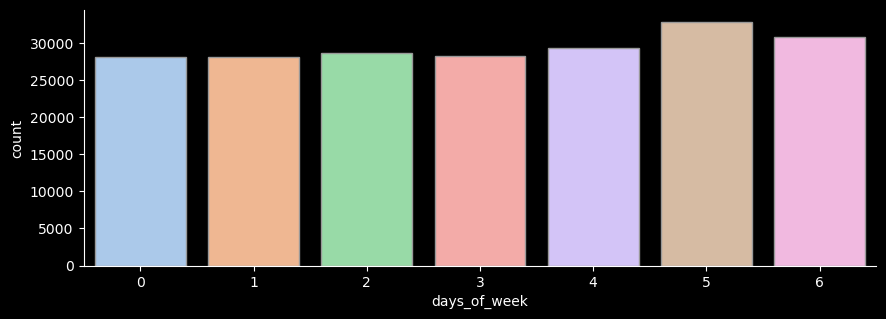

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(['dark_background'])

# 0:월요일, ... 5:토요일, 6:일요일
# 토요일 1위, 일요일 2위
sns.catplot(x='days_of_week', kind='count', palette='pastel', edgecolor='.6', data=df_core_store);
plt.gcf().set_size_inches(10, 3)

In [35]:
# 주말(1), 주중(0) 소비형태 비교

import numpy as np

df_core_store['weekend'] = np.where(df_core_store['days_of_week'].isin([5,6]), 1, 0)
df_core_store['weekend'].value_counts()

weekend
0    142498
1     63622
Name: count, dtype: int64

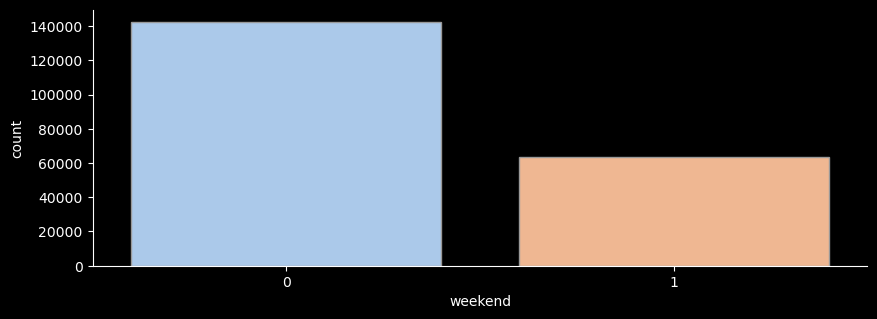

In [36]:
# 주말(1), 주중(0) Plotting

sns.catplot(x='weekend', kind='count', palette='pastel', edgecolor='.6', data=df_core_store);
plt.gcf().set_size_inches(10, 3)

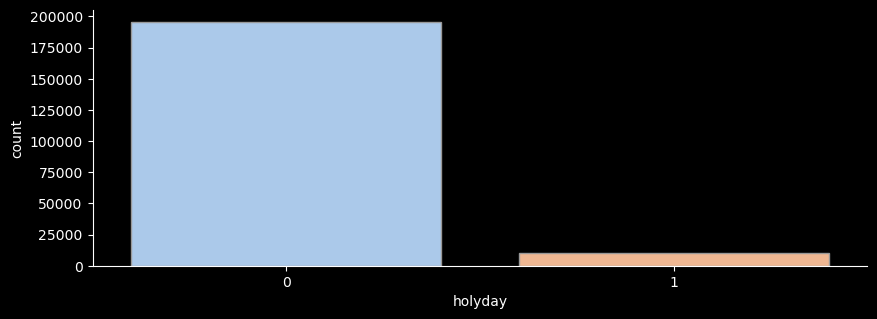

In [37]:
# holyday(공휴일) 여부에 따른 핵심업종 소비 횟수 비교

sns.catplot(x='holyday', kind='count', palette='pastel', edgecolor='.6', data=df_core_store);
plt.gcf().set_size_inches(10, 3)

### ► 핵심업종 일시불 및 할부결제 분석

In [38]:
df_core_store.head(5)

,store_id,date,time,card_id,amount,installments,days_of_week,holyday,weekend
0,0,2016-12-14,18:05:31,d297bba73f,5,0.0,2,0,0
1,0,2016-12-14,18:05:54,d297bba73f,-5,0.0,2,0,0
2,0,2016-12-19,12:42:31,0880849c05,144,0.0,0,0,0
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,0.0,0,0,0
4,0,2016-12-19,13:31:08,7ad237eed0,24,0.0,0,0,0


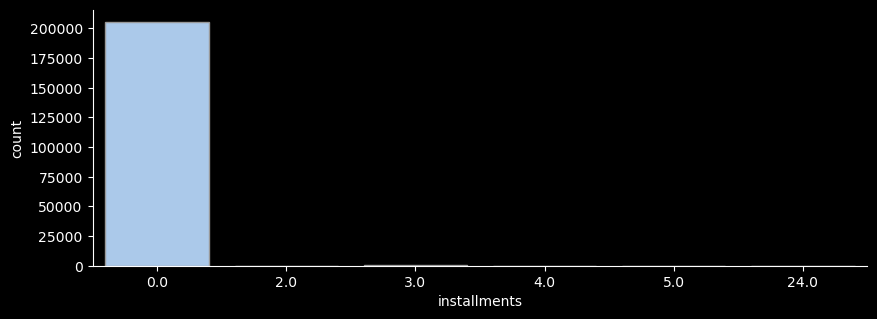

In [39]:
# 0-일시불 그외는 N 개월 할부

sns.catplot(x='installments', kind='count', palette='pastel', edgecolor='.6', data=df_core_store);
plt.gcf().set_size_inches(10, 3)

In [40]:
# 무려 99% 이상이 일시불 Wow

df_core_store['installments'].value_counts()

installments
0.0     205454
3.0        477
2.0        172
5.0         12
24.0         3
4.0          2
Name: count, dtype: int64

### ► 핵심업종 취소금액 분석

In [41]:
df_core_store.head(5)

,store_id,date,time,card_id,amount,installments,days_of_week,holyday,weekend
0,0,2016-12-14,18:05:31,d297bba73f,5,0.0,2,0,0
1,0,2016-12-14,18:05:54,d297bba73f,-5,0.0,2,0,0
2,0,2016-12-19,12:42:31,0880849c05,144,0.0,0,0,0
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,0.0,0,0,0
4,0,2016-12-19,13:31:08,7ad237eed0,24,0.0,0,0,0


In [42]:
# 취소금액 매출 비중 0.8%

abs(df_core_store[df_core_store['amount'] < 0]['amount'].sum()) / df_core_store['amount'].sum() * 100

0.8132183681150494

In [43]:
# 753, 0, 1342, 221, 428
# 'Store 221'이 가장 많은 취소 금액 비중

df1 = df_core_store[df_core_store['store_id']==753]
df2 = df_core_store[df_core_store['store_id']==0]
df3 = df_core_store[df_core_store['store_id']==1342]
df4 = df_core_store[df_core_store['store_id']==221]
df5 = df_core_store[df_core_store['store_id']==428]

print('store(753) :', abs(df1[df1['amount'] < 0]['amount'].sum()) / df1['amount'].sum() * 100)
print('store(0) :', abs(df2[df2['amount'] < 0]['amount'].sum()) / df2['amount'].sum() * 100)
print('store(1342) :', abs(df3[df3['amount'] < 0]['amount'].sum()) / df3['amount'].sum() * 100)
print('store(221) :', abs(df4[df4['amount'] < 0]['amount'].sum()) / df4['amount'].sum() * 100)
print('store(428) :', abs(df5[df5['amount'] < 0]['amount'].sum()) / df5['amount'].sum() * 100)

store(753) : 0.38674979558505945
store(0) : 1.396741801826344
store(1342) : 0.5834555828002225
store(221) : 1.7059220251109624
store(428) : 1.1333603616510848


### ► 핵심업종 년도별 매출 비중 변화 분석

In [44]:
df_core_store.head(5)

,store_id,date,time,card_id,amount,installments,days_of_week,holyday,weekend
0,0,2016-12-14,18:05:31,d297bba73f,5,0.0,2,0,0
1,0,2016-12-14,18:05:54,d297bba73f,-5,0.0,2,0,0
2,0,2016-12-19,12:42:31,0880849c05,144,0.0,0,0,0
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,0.0,0,0,0
4,0,2016-12-19,13:31:08,7ad237eed0,24,0.0,0,0,0


In [45]:
# Time data 처리

import datetime
df_core_store['Date_merge'] = df['date'].astype(str) + ' ' + df['time'].astype(str)
df_core_store['Date_merge'] = pd.to_datetime(df_core_store['Date_merge'])

In [46]:
# 2016년 8월 1일 ~ 2018년 7월 31일까지의 Data

df_core_store['Date_merge'].min(), df_core_store['Date_merge'].max()

(Timestamp('2016-08-01 00:14:51'), Timestamp('2018-07-31 23:56:14'))

In [47]:
# 년, 월로 시간데이터 분해

df_core_store['year'] = df_core_store['Date_merge'].dt.year
df_core_store['month'] = df_core_store['Date_merge'].dt.month
df_core_store.head(5)

,store_id,date,time,card_id,amount,installments,days_of_week,holyday,weekend,Date_merge,year,month
0,0,2016-12-14,18:05:31,d297bba73f,5,0.0,2,0,0,2016-12-14 18:05:31,2016,12
1,0,2016-12-14,18:05:54,d297bba73f,-5,0.0,2,0,0,2016-12-14 18:05:54,2016,12
2,0,2016-12-19,12:42:31,0880849c05,144,0.0,0,0,0,2016-12-19 12:42:31,2016,12
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,0.0,0,0,0,2016-12-19 12:48:08,2016,12
4,0,2016-12-19,13:31:08,7ad237eed0,24,0.0,0,0,0,2016-12-19 13:31:08,2016,12


In [49]:
# 핵심업종별 매출 금액 by 년도

df_year = pd.DataFrame(df_core_store.groupby(['store_id', 'year'])['amount'].sum()).reset_index()
df_year.head(5)

,store_id,year,amount
0,0,2016,137336
1,0,2017,3235476
2,0,2018,1861799
3,221,2016,528397
4,221,2017,1318231


In [50]:
df_pivot = pd.pivot_table(df_year,
                         index = 'year',
                         columns = 'store_id',
                         values = 'amount')
df_pivot

store_id,0,221,428,753,1342
year,,,,,
2016,137336.0,528397.0,305336.0,525324.0,NaN
2017,3235476.0,1318231.0,665009.0,8129699.0,5113535.0
2018,1861799.0,666617.0,341859.0,819578.0,2187792.0


In [51]:
df_pivot = df_pivot.reset_index()
df_pivot.columns.names=['']
df_pivot

,year,0,221,428,753,1342
0,2016,137336.0,528397.0,305336.0,525324.0,NaN
1,2017,3235476.0,1318231.0,665009.0,8129699.0,5113535.0
2,2018,1861799.0,666617.0,341859.0,819578.0,2187792.0


In [52]:
df_pivot = df_pivot.set_index('year')
df_pivot

,0,221,428,753,1342
year,,,,,
2016,137336.0,528397.0,305336.0,525324.0,NaN
2017,3235476.0,1318231.0,665009.0,8129699.0,5113535.0
2018,1861799.0,666617.0,341859.0,819578.0,2187792.0


In [54]:
df_pivot = df_pivot.fillna(0)
df_pivot['total'] = df_pivot.iloc[:,0] + df_pivot.iloc[:,1] + df_pivot.iloc[:,2] + df_pivot.iloc[:,3] + df_pivot.iloc[:,4]
df_pivot

,0,221,428,753,1342,total
year,,,,,,
2016,137336.0,528397.0,305336.0,525324.0,0.0,1496393.0
2017,3235476.0,1318231.0,665009.0,8129699.0,5113535.0,18461950.0
2018,1861799.0,666617.0,341859.0,819578.0,2187792.0,5877645.0


In [55]:
# ▶ total 금액으로 나눠서 매출 비중으로 변환

df_pivot.iloc[:,0] = (df_pivot.iloc[:,0] / df_pivot['total'])
df_pivot.iloc[:,1] = (df_pivot.iloc[:,1] / df_pivot['total'])
df_pivot.iloc[:,2] = (df_pivot.iloc[:,2] / df_pivot['total'])
df_pivot.iloc[:,3] = (df_pivot.iloc[:,3] / df_pivot['total'])
df_pivot.iloc[:,4] = (df_pivot.iloc[:,4] / df_pivot['total'])

df_pivot

,0,221,428,753,1342,total
year,,,,,,
2016,0.091778,0.353114,0.204048,0.351060,0.000000,1496393.0
2017,0.175251,0.071403,0.036021,0.440349,0.276977,18461950.0
2018,0.316759,0.113416,0.058163,0.139440,0.372223,5877645.0


In [56]:
df_pivot = df_pivot.drop(['total'], axis=1)
df_pivot

,0,221,428,753,1342
year,,,,,
2016,0.091778,0.353114,0.204048,0.351060,0.000000
2017,0.175251,0.071403,0.036021,0.440349,0.276977
2018,0.316759,0.113416,0.058163,0.139440,0.372223


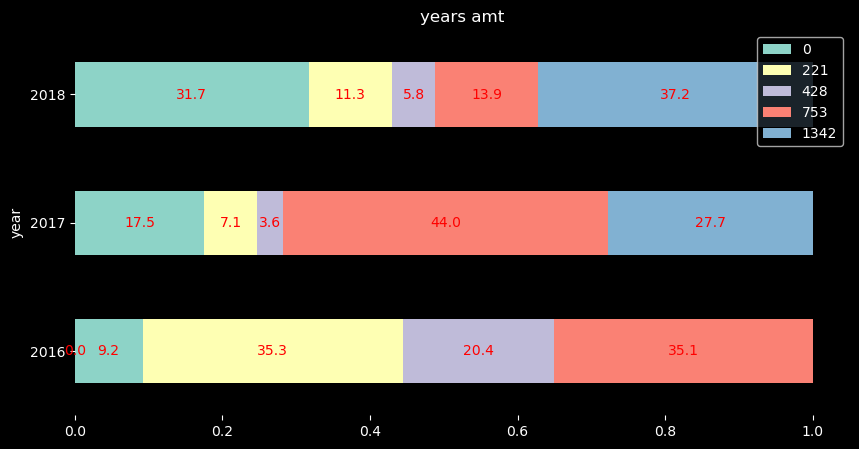

In [58]:
plt.style.use(['dark_background'])

ax = df_pivot.plot(kind='barh', stacked=True, title="years amt", rot=0);
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.1f"%(width*100), xy=(left+width/2, bottom+height/2), ha='center', va='center', color='r');

plt.box(False)
plt.gcf().set_size_inches(10, 5)
plt.show()